In [207]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import h5py

In [154]:
data_dir = '/Users/ferasaltwal/Documents/DSI/Capstone/extracted-png-sorted'
categories = ['AD', 'MCI', 'CN']

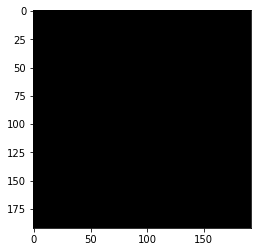

In [155]:
for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [156]:
print(img_array.shape)

(192, 192)


In [157]:
print(img_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


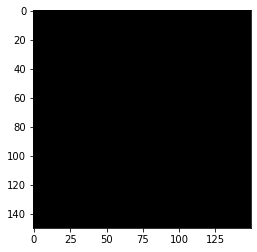

In [158]:
img_size = 150

new_arrray = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_arrray, cmap='gray')
plt.show()

In [159]:
print(new_arrray.shape)

(150, 150)


In [160]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_arrray = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_arrray, class_num])
            except Exception as e:
                pass

In [161]:
create_training_data()

100%|██████████| 12285/12285 [00:21<00:00, 561.62it/s]


In [162]:
print(len(training_data))

34489


In [163]:
import random

random.shuffle(training_data)

In [164]:
for sample in training_data[:10]:
    print(sample[1])

2
0
2
0
1
2
1
1
1
1


In [186]:
X = []
y = []

In [187]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [167]:
import pickle
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

In [168]:
#this is how you load the model if needed
# X = pickle.load(open('X.pickle', 'rb'))

In [188]:
X = X/255.0

In [193]:
y = np.array(y)

In [200]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, 3)

In [202]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [203]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [204]:
history = model.fit(X, y, batch_size=200, epochs = 3, validation_split=0.2)

Epoch 1/3
138/138 [==============================] - 472s 3s/step - loss: 0.9885 - accuracy: 0.4966 - val_loss: 0.7623 - val_accuracy: 0.6703
Epoch 2/3
138/138 [==============================] - 457s 3s/step - loss: 0.5250 - accuracy: 0.7849 - val_loss: 0.3521 - val_accuracy: 0.8624
Epoch 3/3
138/138 [==============================] - 455s 3s/step - loss: 0.2007 - accuracy: 0.9273 - val_loss: 0.1566 - val_accuracy: 0.9452


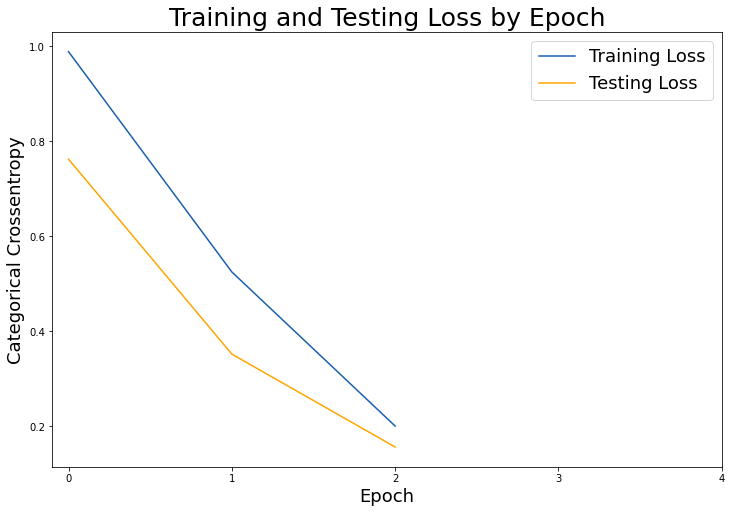

In [205]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(5), np.arange(5))

plt.legend(fontsize = 18);

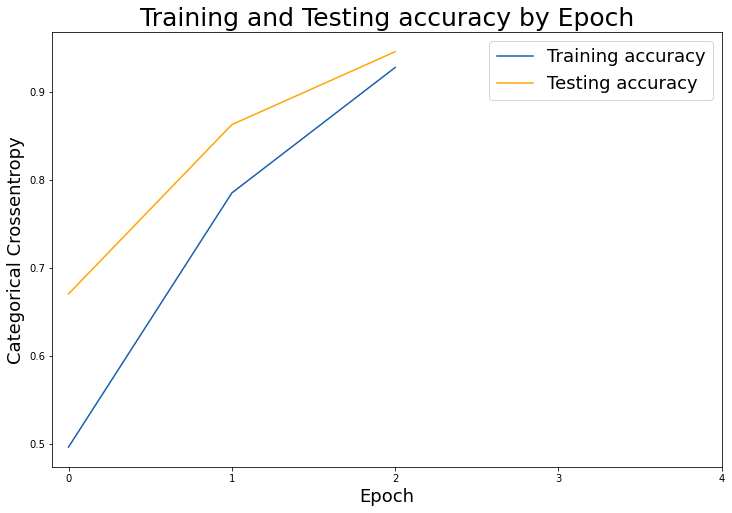

In [206]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training accuracy', color='#185fad')
plt.plot(test_acc, label='Testing accuracy', color='orange')

# Set title
plt.title('Training and Testing accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(5), np.arange(5))

plt.legend(fontsize = 18);

In [152]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                5308480   
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [208]:
model.save('first_3_class_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: first_3_class_model/assets
